In [78]:
import open3d as o3d
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [79]:
image1 = cv.imread("colorimg.jpg")
image1 = cv.resize(image1, (int(image1.shape[1] * 0.5), int(image1.shape[0] * 0.5)), interpolation=cv.INTER_AREA)


In [80]:
color_raw = o3d.io.read_image("colorimg.jpg")
depth_raw = o3d.io.read_image("depth.png")
rgbd = o3d.geometry.RGBDImage.create_from_color_and_depth(color_raw, depth_raw, convert_rgb_to_intensity=False)
print(rgbd)

RGBDImage of size 
Color image : 4000x3000, with 3 channels.
Depth image : 4000x3000, with 1 channels.
Use numpy.asarray to access buffer data.


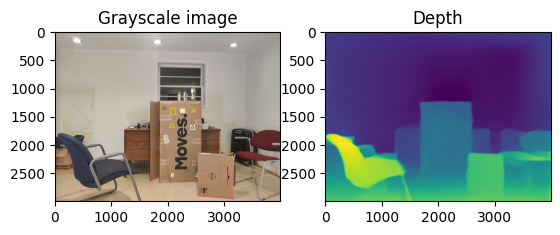

In [81]:
plt.subplot(1,2,1)
plt.title('Grayscale image')
plt.imshow(rgbd.color)
plt.subplot(1,2,2)
plt.title('Depth')
plt.imshow(rgbd.depth)
plt.show()

In [82]:
intrinsic_matrix = np.array([[1552.58610, 0, 768.938827],
                                 [0, 1552.57499, 1006.09656],
                                 [0, 0, 1]])

In [83]:
camera_intrinsic = o3d.camera.PinholeCameraIntrinsic(image1.shape[1], image1.shape[0], intrinsic_matrix[0,0], intrinsic_matrix[1,1], intrinsic_matrix[0,2], intrinsic_matrix[1,2])
# camera_intrinsic = o3d.camera.PinholeCameraIntrinsic(
#         o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault)

In [84]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd, camera_intrinsic)

pcd.transform([[1,0,0,0],[0,-1,0,0],[0,0,1,0],[0,0,0,1]])


PointCloud with 11996094 points.

In [86]:
o3d.visualization.draw_geometries([pcd])